# 自然語言處理 HW1 
# 組員 : 110590450 歐佳昀 110590452 莊于潔
110590450 歐佳昀(70%) : 作業架構、流程、分析、改善

110590452 莊于潔(30%) : 作業模型挑選、參數調整
## due 4/1,2024

- Goal: Sentiment classification on open source datasets

- Input: TSATC: Twitter Sentiment Analysis Training Corpus (to be detailed later)

- Output: Training classifiers to classify the sentiment of tweets (to be detailed later)

### Tasks
- Performing sentiment classification on twitter data (as detailed in the following slides)

- Data: an open dataset from Huggingface

- You have to submit the classification output

### Data: 
[TSATC: Twitter Sentiment Analysis Training Corpus] from Hugging Face
1,578,627 tweets, about 15MB in size
Available at:
https://huggingface.co/datasets/carblacac/twitter-sentiment-analysis 

Format: 
Two text files consisting of lines of records
Each record contains 2 columns: feeling, text

To train a classifier using the training set in any programming language
To test the classification result for the test set

### Output format: 
Classification results
- Precision
- Recall 
- F-measure
- Accuracy

### Logistic Regression with TfidfVectorizer

- Precision = 0.77
- Recall = 0.77
- F-measure = 0.77
- Accuracy = 0.77


|              | precision | recall | f1-score | support |
| :----------: | :-------: | :----: | :--------: | :-------: |
|      0       |   0.78    |  0.76  | 0.77     | 30969   |
|      1       |   0.76    |  0.79  | 0.78     | 31029   |
|   accuracy   |           |        | 0.77     | 61998   |
|  macro avg   |   0.77    |  0.77  | 0.77     | 61998   |
| weighted avg |   0.77    |  0.77  | 0.77     | 61998   |

##### BernoulliNB with TfidfVectorizer

- Precision = 0.77
- Recall = 0.77
- F-measure = 0.77
- Accuracy = 0.77

|              | precision | recall | f1-score | support |
| :----------: | :-------: | :----: | :--------: | :-------: |
|      0       |   0.77    |  0.75  | 0.76     | 30969   |
|      1       |   0.76    |  0.78  | 0.77     | 31029   |
|   accuracy   |           |        | 0.77     | 61998   |
|  macro avg   |   0.77    |  0.77  | 0.77     | 61998   |
| weighted avg |   0.77    |  0.77  | 0.77     | 61998   |

##### Logistic Regression with CountVectorizer

- Precision = 0.77
- Recall = 0.77
- F-measure = 0.77
- Accuracy = 0.77

|              | precision | recall | f1-score | support |
| :----------: | :-------: | :----: | :--------: | :-------: |
|      0       |   0.75    |  0.75  | 0.77     | 30969   |
|      1       |   0.80    |  0.80  | 0.78     | 31029   |
|   accuracy   |           |        | 0.77     | 61998   |
|  macro avg   |   0.77    |  0.77  | 0.77     | 61998   |
| weighted avg |   0.77    |  0.77  | 0.77     | 61998   |

##### BernoulliNB Regression with CountVectorizer

- Precision = 0.77
- Recall = 0.77
- F-measure = 0.77
- Accuracy = 0.77


|              | precision | recall | f1-score | support |
| :----------: | :-------: | :----: | :--------: | :-------: |
|      0       |   0.77    |  0.75  | 0.76     | 30969   |
|      1       |   0.76    |  0.78  | 0.77     | 31029   |
|   accuracy   |           |        | 0.77     | 61998   |
|  macro avg   |   0.77    |  0.77  | 0.77     | 61998   |
| weighted avg |   0.77    |  0.77  | 0.77     | 61998   |



## 引入需要的庫

In [1]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve, auc    

## 分裝處理train、test資料集

In [2]:
data = pd.read_csv("data/train_150k.txt", header=None, names=["target", "text"],sep='\t')
data_test = pd.read_csv("data/test_62k.txt", header=None, names=["target", "text"],sep='\t')

data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]
dataset = pd.concat([data_pos, data_neg])


## 換成全小寫

In [3]:
dataset['text']=dataset['text'].str.lower()

## 清除網站連結

In [4]:
def cleaning_URLs(data):
    return re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
data_test['text'] = data_test['text'].apply(lambda x: cleaning_URLs(x))

## 去除標點符號、奇怪符號

In [5]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations

def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
data_test['text']= data_test['text'].apply(lambda x: cleaning_punctuations(x))

## 置換連續重複字元

In [6]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1\1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
data_test['text'] = data_test['text'].apply(lambda x: cleaning_repeating_char(x))

## 清除數字

In [7]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
data_test['text'] = data_test['text'].apply(lambda x: cleaning_numbers(x))

## 清除單一字元

In [8]:
def cleaning_single_c(data):
    return re.sub(r'\b[a-zA-Z]\b', '', data)

dataset['text'] = dataset['text'].apply(lambda x: cleaning_single_c(x))
data_test['text'] = data_test['text'].apply(lambda x: cleaning_single_c(x))

## 將詞替換成原型形式

In [9]:
def lemmatize_text(text):
    # init WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    # 將文本分詞並將每個單詞轉換為其原型形式
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text.split()]
    # 將單詞列表重新組合為文本
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text
dataset['text'] = dataset['text'].apply(lambda x: lemmatize_text(x))
data_test['text'] = data_test['text'].apply(lambda x: lemmatize_text(x))


## 清除非英文詞 
(此為經觀察後發現資料及非英文詞為極少數特徵)

In [10]:
def cleaning_non_eng(data):
    cleaned_data = re.sub(r'[^a-zA-Z\s]', '', data)
    return cleaned_data
dataset['text'] = dataset['text'].apply(cleaning_non_eng)
data_test['text'] = data_test['text'].apply(cleaning_non_eng)

## 清除多餘空白

In [11]:
def cleaning_multi_space(data):
    return re.sub(r'\s+', ' ', data, flags=re.I)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_multi_space(x))
data_test['text'] = data_test['text'].apply(lambda x: cleaning_multi_space(x))

## 存檔查看整理後的train
(非必要執行)

In [12]:
dataset.to_csv("other_data/dataset.csv",index=False)

## 設定停用字
(可根據詞雲圖動態調整)

In [13]:
stopwordlist = ['a','an','about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves','today','day','½t','im','go','<UNK>']
            
            #  'today','day','im','i m','go','get','got','time','morning','tomorrow','amp',###
            #  'going','really','one','twitter','wa','like','ill','½s','thats','still','but',
            #  'know','½t','make','see','ive','much','off']  ###

## 查看詞雲圖

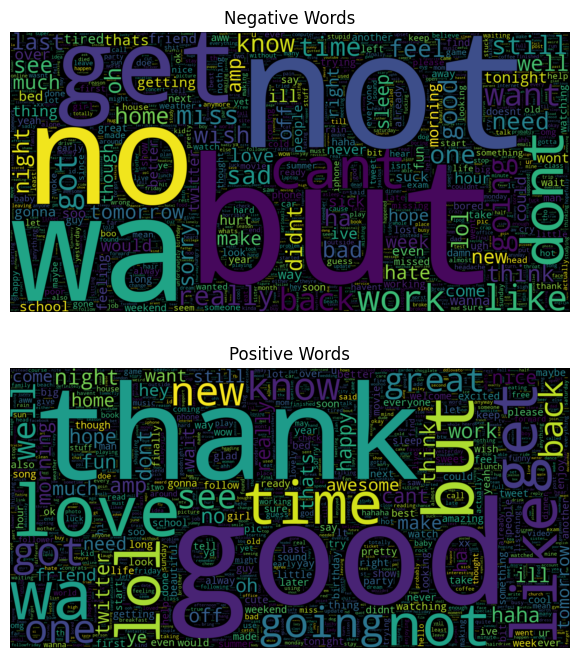

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

data_neg = dataset['text'][74968:]
wc_neg = WordCloud(stopwords=stopwordlist ,max_words=2000, width=1600, height=800, collocations=False).generate(" ".join(data_neg))
axes[0].imshow(wc_neg, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Negative Words')  # 使用 set_title() 方法设置标题

data_pos = dataset['text'][:74968]
wc_pos = WordCloud(stopwords=stopwordlist ,max_words=2000, width=1600, height=800, collocations=False).generate(" ".join(data_pos))
axes[1].imshow(wc_pos, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Positive Words')  # 使用 set_title() 方法设置标题

plt.show()

## 特徵向量化(TfidfVectorizer)
(如執行完整NLP_P1 後要重跑，請從從特徵提取欄位開始執行)
(此處如warning，為因停用詞設置unk(設置unknown word)，請忽略)

In [15]:
dataset = dataset.sample(frac=1).reset_index(drop=True) #將訓練集打亂

X_train = dataset.text
y_train = dataset.target
X_test = data_test.text
y_test = data_test.target

vectoriser = TfidfVectorizer( min_df=7,stop_words=stopwordlist,max_features=3500)

vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)


feature_names_df = pd.DataFrame({'Feature Names': vectoriser.get_feature_names_out()})
# 將所選特徵保存為CSV文件
feature_names_df.to_csv('other_data/feature_names.csv', index=False)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['unk'] not in stop_words.
  warnings.warn(


No. of feature_words:  3500


## 模型數值評估

In [16]:
def model_Evaluate(model,name):
    # Predict values for Test dataset
    if(name =="GaussianNB"):
        
        y_pred = model.predict(X_test.toarray())  # Convert to array
    else:
        y_pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred))
    report  = classification_report(y_test, y_pred,output_dict=True)
    
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f_measure = report['weighted avg']['f1-score']
    accuracy = report['accuracy']

    
    print("Precision: {:.2f}". format(precision))
    print("Recall: {:.2f}". format(recall))    
    print("F-measure: {:.2f}". format(f_measure))
    print("Accuracy: {:.2f}". format(accuracy))
    


## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=200)

# Train the model
logreg_model.fit(X_train, y_train)

# Evaluate the model
model_Evaluate(logreg_model, "LogisticRegression")


LogisticRegression
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     30969
           1       0.77      0.79      0.78     31029

    accuracy                           0.77     61998
   macro avg       0.77      0.77      0.77     61998
weighted avg       0.77      0.77      0.77     61998

Precision: 0.77
Recall: 0.77
F-measure: 0.77
Accuracy: 0.77


## k-Nearest Neighbors
(執行時間過長)且正確率低，不使用

In [18]:
# from sklearn.neighbors import KNeighborsClassifier

# # Create a k-NN model
# knn_model = KNeighborsClassifier()

# # Train the model
# knn_model.fit(X_train, y_train)

# # Evaluate the model
# model_Evaluate(knn_model, "KNeighborsClassifier")

## 高斯 Naïve Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train.toarray(), y_train)  # GaussianNB requires array input

# Evaluate the model
model_Evaluate(gnb_model, "GaussianNB")

GaussianNB
              precision    recall  f1-score   support

           0       0.71      0.68      0.69     30969
           1       0.69      0.72      0.71     31029

    accuracy                           0.70     61998
   macro avg       0.70      0.70      0.70     61998
weighted avg       0.70      0.70      0.70     61998

Precision: 0.70
Recall: 0.70
F-measure: 0.70
Accuracy: 0.70


## BernoulliNB ->  白努力素葉貝斯分析

In [20]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel,'BernoulliNB')

BernoulliNB
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     30969
           1       0.76      0.78      0.77     31029

    accuracy                           0.77     61998
   macro avg       0.77      0.77      0.77     61998
weighted avg       0.77      0.77      0.77     61998

Precision: 0.77
Recall: 0.77
F-measure: 0.77
Accuracy: 0.77


## MultinomialNB ->  單純貝斯分析

In [21]:
MNB_model = MultinomialNB()
MNB_model.fit(X_train, y_train)
model_Evaluate(MNB_model,"MultinomialNB")

MultinomialNB
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     30969
           1       0.76      0.74      0.75     31029

    accuracy                           0.76     61998
   macro avg       0.76      0.76      0.76     61998
weighted avg       0.76      0.76      0.76     61998

Precision: 0.76
Recall: 0.76
F-measure: 0.76
Accuracy: 0.76


## CountVectorizer  
(使用bag 進行向量提取)

In [22]:
X_train = dataset.text
y_train = dataset.target
X_test = data_test.text
y_test = data_test.target

vectorizer = CountVectorizer(stop_words=stopwordlist,max_features=3500)

text = vectorizer.fit_transform(dataset['text'])
X_test  = vectorizer.transform(data_test['text'])

feature_names_df = pd.DataFrame({'Feature Names': vectorizer.get_feature_names_out()})
# 將所選特徵保存為CSV文件
feature_names_df.to_csv('other_data/feature_names_CountVectorizer.csv', index=False)

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['unk'] not in stop_words.
  warnings.warn(


## 置換停用字 
(無法提高正確率，執行時間長)

In [23]:
# vectorizer = CountVectorizer(stop_words=stopwordlist,max_features=3500)

# text = vectorizer.fit_transform(dataset['text'])
# X_test  = vectorizer.transform(data_test['text'])

# v = vectorizer.get_feature_names_out()
 
# def preprocess_text(text):
#     # 将未知单词替换为<UNK>
#     return ' '.join(['<UNK>' if word not in v else word for word in text.split()])

# X_test_preprocessed = [preprocess_text(text) for text in data_test.text]

# X_train_vectorized = vectorizer.transform( dataset["text"])
# X_test_vectorized = vectorizer.transform(X_test_preprocessed)


# text = X_train_vectorized
# X_test = X_test_vectorized 

## MultinomialNB

In [24]:

MNB_model = MultinomialNB()

MNB_model.fit(text, y_train)
model_Evaluate(MNB_model,"MNB_model")

MNB_model
              precision    recall  f1-score   support

           0       0.75      0.78      0.76     30969
           1       0.77      0.74      0.76     31029

    accuracy                           0.76     61998
   macro avg       0.76      0.76      0.76     61998
weighted avg       0.76      0.76      0.76     61998

Precision: 0.76
Recall: 0.76
F-measure: 0.76
Accuracy: 0.76


## BernoulliNB

In [25]:
BNBmodel = BernoulliNB()

BNBmodel.fit(text, y_train)
model_Evaluate(BNBmodel,"BNBmodel")

BNBmodel
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     30969
           1       0.76      0.78      0.77     31029

    accuracy                           0.77     61998
   macro avg       0.77      0.77      0.77     61998
weighted avg       0.77      0.77      0.77     61998

Precision: 0.77
Recall: 0.77
F-measure: 0.77
Accuracy: 0.77


## LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=200)

logreg_model.fit(text, y_train)

model_Evaluate(logreg_model, "LogisticRegression")


LogisticRegression
              precision    recall  f1-score   support

           0       0.79      0.75      0.77     30969
           1       0.76      0.80      0.78     31029

    accuracy                           0.77     61998
   macro avg       0.77      0.77      0.77     61998
weighted avg       0.77      0.77      0.77     61998

Precision: 0.77
Recall: 0.77
F-measure: 0.77
Accuracy: 0.77


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# 創建一個 TF-IDF 向量化器
vectorizer = TfidfVectorizer()

# 創建一個 Logistic Regression 模型
logreg_model = LogisticRegression(max_iter=200)

# 訓練 TF-IDF 向量化器並轉換訓練數據
X_train_tfidf = vectorizer.fit_transform(X_train)

# 訓練 Logistic Regression 模型
logreg_model.fit(X_train_tfidf, y_train)

def predict_label(model, sentence, vectorizer):
    # 將句子轉換為 TF-IDF 向量
    sentence_vectorized = vectorizer.transform([sentence])
    
    # 使用模型進行預測
    predicted_label = model.predict(sentence_vectorized)
    
    return predicted_label[0]

# 測試預測功能
sentence = "Today is not happiness."
predicted_label = predict_label(logreg_model, sentence, vectorizer)
print("Predicted Label:", predicted_label)

Predicted Label: 1
